In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.Load Dataset.

In [2]:
from glob import glob

file_list = glob("./data/bike/*.csv")
file_list

['./data/bike\\sampleSubmission.csv',
 './data/bike\\test.csv',
 './data/bike\\train.csv']

In [3]:
train = pd.read_csv(file_list[2], parse_dates=["datetime"])
train.shape

(10886, 12)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
test = pd.read_csv(file_list[1], parse_dates=["datetime"])
test.shape

(6493, 9)

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [8]:
display(test.head())

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


### 2.Feature Engineering

In [9]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape

(10886, 19)

In [10]:
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second
test["dayofweek"] = test["datetime"].dt.dayofweek
display(test.shape)

(6493, 16)

In [11]:
print(f"train windspeed column :\n{train['windspeed'].value_counts().head()}", 
      f"test windspeed column :\n{test['windspeed'].value_counts().head()}",
      sep="\n\n")

train windspeed column :
0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
Name: windspeed, dtype: int64

test windspeed column :
0.0000     867
11.0014    638
8.9981     618
12.9980    615
7.0015     583
Name: windspeed, dtype: int64


<Axes: title={'center': "Test's Windspeed"}, xlabel='windspeed', ylabel='count'>

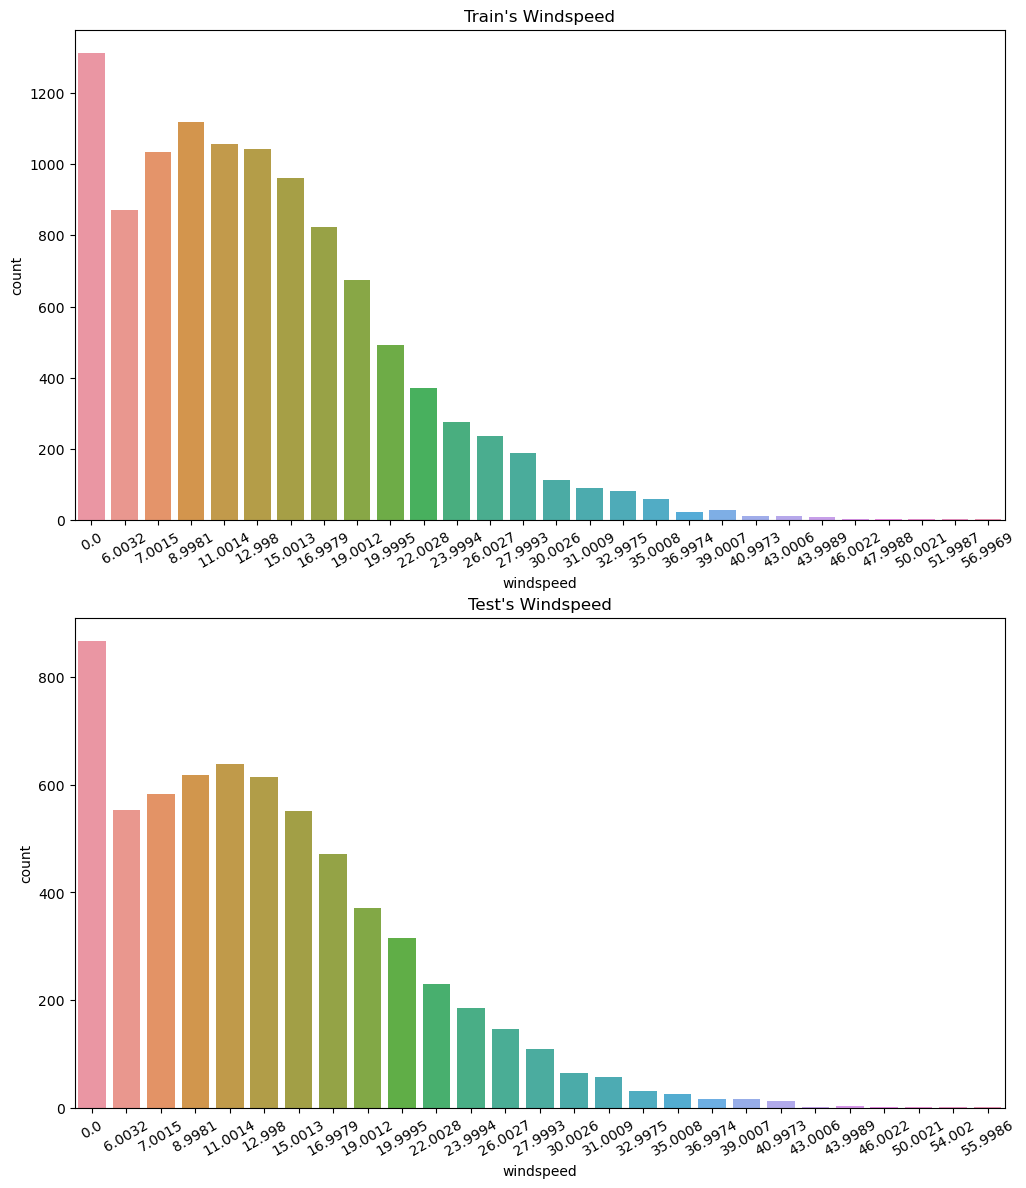

In [12]:
fig, axes = plt.subplots(2)
fig.set_size_inches(12, 14)

plt.sca(axes[0])
plt.xticks(rotation=30)
axes[0].set(title="Train's Windspeed")
sns.countplot(train,
              x="windspeed",
              ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation=30)
axes[1].set(title="Test's Windspeed")
sns.countplot(test,
              x="windspeed",
              ax=axes[1])

In [13]:
train_windspeed_zero = train[train["windspeed"] == 0]
train_windspeed_non_zero = train[train["windspeed"] != 0]
print(f"train\nwindspeed = 0: {train_windspeed_zero.shape[0]}",
      f"windspeed > 0: {train_windspeed_non_zero.shape[0]}"
      ,sep="\n")

train
windspeed = 0: 1313
windspeed > 0: 9573


In [14]:
data_windspeed_zero = train[train["windspeed"] == 0].copy()
data_windspeed_non_zero = train[train["windspeed"] != 0].copy()

In [15]:
data_windspeed_zero.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [16]:
data_windspeed_non_zero.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,0,0,5
10,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36,2011,1,1,10,0,0,5
11,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,56,2011,1,1,11,0,0,5
12,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,84,2011,1,1,12,0,0,5
13,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94,2011,1,1,13,0,0,5


In [17]:
feature_column_list = ["season", "weather", "humidity", "month", "temp", "year", "atemp"]
feature_column_list

['season', 'weather', 'humidity', 'month', 'temp', 'year', 'atemp']

In [18]:
data_windspeed_non_zero["windspeed"] = data_windspeed_non_zero["windspeed"].astype("str")

In [19]:
data_windspeed_non_zero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9573 entries, 5 to 10885
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    9573 non-null   datetime64[ns]
 1   season      9573 non-null   int64         
 2   holiday     9573 non-null   int64         
 3   workingday  9573 non-null   int64         
 4   weather     9573 non-null   int64         
 5   temp        9573 non-null   float64       
 6   atemp       9573 non-null   float64       
 7   humidity    9573 non-null   int64         
 8   windspeed   9573 non-null   object        
 9   casual      9573 non-null   int64         
 10  registered  9573 non-null   int64         
 11  count       9573 non-null   int64         
 12  year        9573 non-null   int64         
 13  month       9573 non-null   int64         
 14  day         9573 non-null   int64         
 15  hour        9573 non-null   int64         
 16  minute      9573 non-nu

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_model_windspeed = RandomForestClassifier()

rf_model_windspeed.fit(data_windspeed_non_zero[feature_column_list], data_windspeed_non_zero["windspeed"])

windspeed_predict = rf_model_windspeed.predict(data_windspeed_zero[feature_column_list])

In [21]:
len(windspeed_predict)

1313

In [22]:
predict_windspeed_zero = data_windspeed_zero
predict_windspeed_non_zero = data_windspeed_non_zero

In [23]:
predict_windspeed_zero.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [24]:
predict_windspeed_non_zero.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,0,0,5
10,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36,2011,1,1,10,0,0,5
11,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,56,2011,1,1,11,0,0,5
12,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,84,2011,1,1,12,0,0,5
13,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94,2011,1,1,13,0,0,5


In [25]:
predict_windspeed_zero["windspeed"] = windspeed_predict
predict_windspeed_zero.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,6.0032,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,6.0032,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,6.0032,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,6.0032,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,6.0032,0,1,1,2011,1,1,4,0,0,5


In [26]:
predict_windspeed_zero["windspeed"] = predict_windspeed_zero["windspeed"].astype("float")

<Axes: xlabel='windspeed', ylabel='count'>

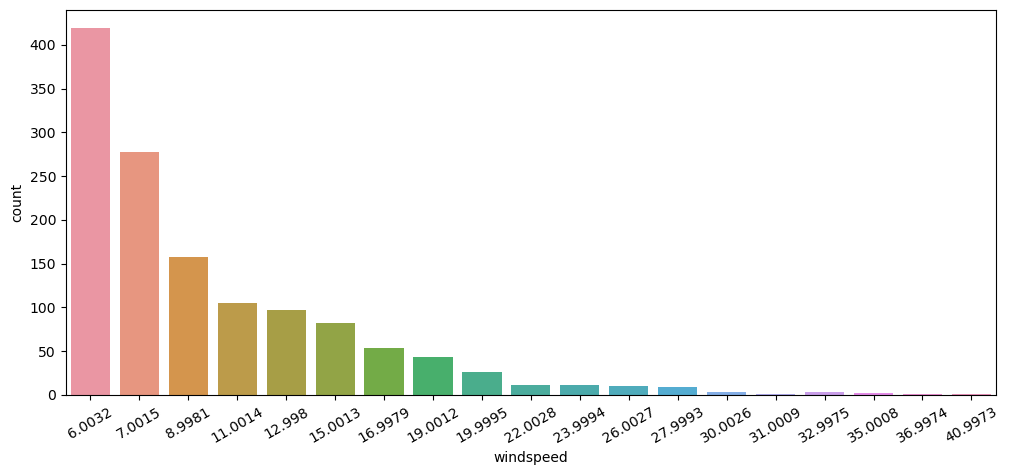

In [27]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=30)
sns.countplot(predict_windspeed_zero,
              x="windspeed")

In [28]:
data = pd.concat([predict_windspeed_non_zero, predict_windspeed_zero]).sort_index()
data.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,6.0032,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,6.0032,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,6.0032,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,6.0032,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,6.0032,0,1,1,2011,1,1,4,0,0,5


In [29]:
data["windspeed"] = data["windspeed"].astype("float")
data["windspeed"].describe()

count    10886.000000
mean        14.007689
std          7.051209
min          6.003200
25%          8.998100
50%         12.998000
75%         19.001200
max         56.996900
Name: windspeed, dtype: float64

In [30]:
# from sklearn.ensemble import RandomForestClassifier


# 관측되지 않은 '풍속(windspeed)'은 0으로 표현되는 것으로 보이므로,
# 값이 0이 아닌 다른 값을 이용하여 풍속을 예측하고 이를 이용하여 값을 보정
def predict_windspeed(data:pd.DataFrame) -> pd.DataFrame:
    # "windspeed" 컬럼값에 따라 dataframe 분리
    # - windspeed의 값이 0이 아닌 데이터셋을 이용하여 train
    # - windspeed의 값이 0인 데이터셋으로 test(predict)
    data_windspeed_zero = data[data["windspeed"] == 0].copy()
    data_windspeed_non_zero = data[data["windspeed"] != 0].copy()
    
    # feature로 사용할 컬럼 정의
    feature_column_list = ["season", "weather", "humidity", "month", "temp", "year", "atemp"]

    # train 대상 데이터셋의 labeled column(예측하려는 값)의 data type 변경
    data_windspeed_non_zero["windspeed"] = data_windspeed_non_zero["windspeed"].astype("str")

    # 모델 인스턴스 생성(랜덤포레스트)
    rf_model_windspeed = RandomForestClassifier()

    # 랜덤포레스트 알고리즘을 이용하여 데이터 학습
    rf_model_windspeed.fit(data_windspeed_non_zero[feature_column_list], data_windspeed_non_zero["windspeed"])

    # 학습된 모델을 이용하여 windspeed의 값이 0인 데이터셋의 windspeed 값을 예측
    windspeed_predict = rf_model_windspeed.predict(data_windspeed_zero[feature_column_list])

    # ???
    predict_windspeed_zero = data_windspeed_zero.copy()
    predict_windspeed_non_zero = data_windspeed_non_zero.copy()

    # 예측 결과를 저장
    predict_windspeed_zero["windspeed"] = windspeed_predict

    # 분리했던 데이터셋을 병합
    data = pd.concat([predict_windspeed_non_zero, predict_windspeed_zero]).sort_index()

    # data type 되돌리기
    data["windspeed"] = data["windspeed"].astype("float")

    return data



In [31]:
train = predict_windspeed(train)

In [32]:
test = predict_windspeed(test)

In [33]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,6.0032,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,6.0032,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,6.0032,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,6.0032,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,6.0032,0,1,1,2011,1,1,4,0,0,5


In [34]:
test["windspeed"].describe()

count    6493.000000
mean       13.960410
std         7.008308
min         6.003200
25%         8.998100
50%        12.998000
75%        19.001200
max        55.998600
Name: windspeed, dtype: float64

<Axes: title={'center': "Test's Windspeed"}, xlabel='windspeed', ylabel='count'>

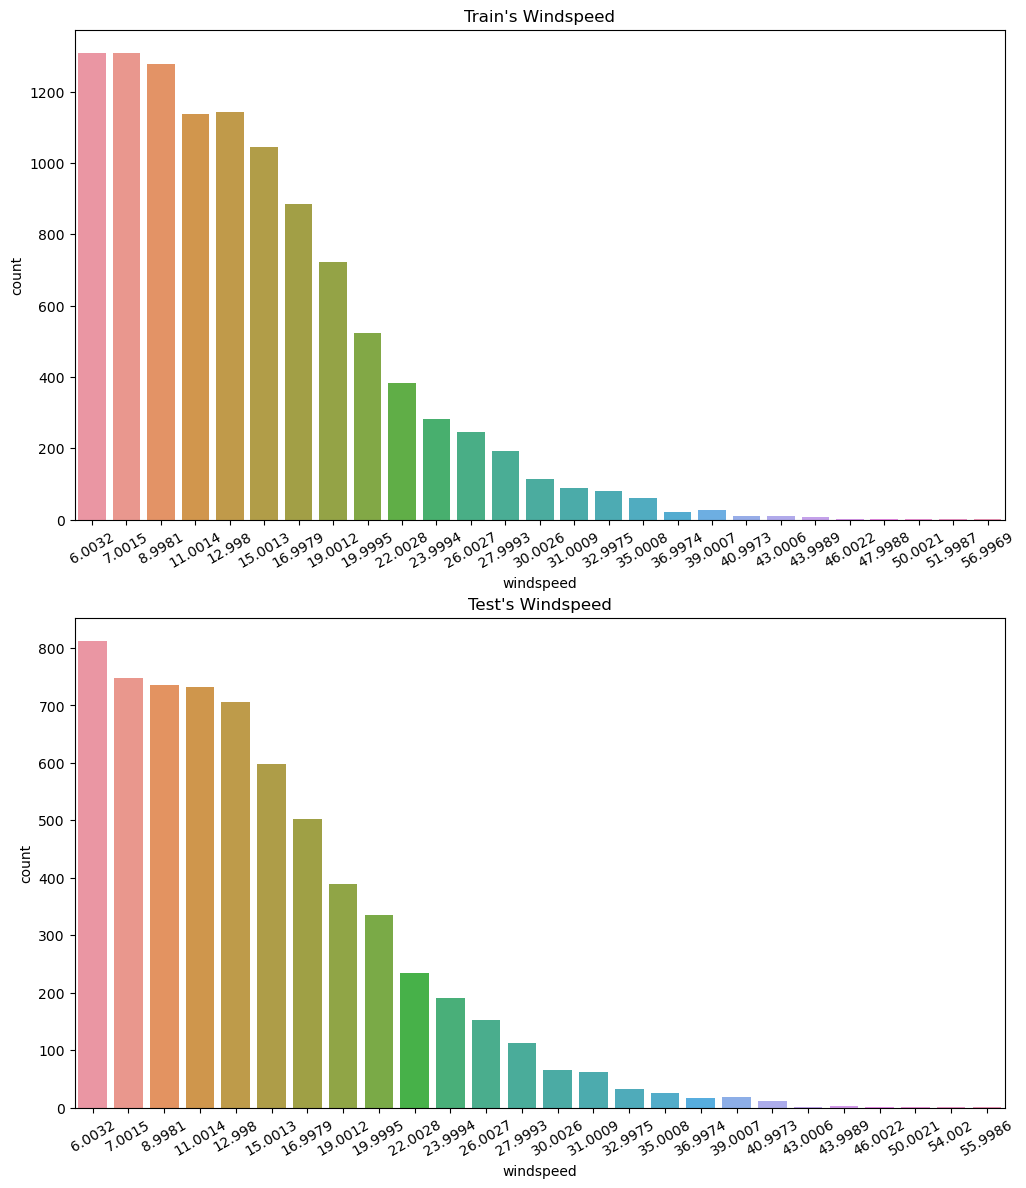

In [35]:
fig, axes = plt.subplots(2)

fig.set_size_inches(12, 14)

plt.sca(axes[0])
axes[0].set(title="Train's Windspeed")
plt.xticks(rotation=30)
sns.countplot(train,
              x="windspeed",
              ax=axes[0])

plt.sca(axes[1])
axes[1].set(title="Test's Windspeed")
plt.xticks(rotation=30)
sns.countplot(test,
              x="windspeed",
              ax=axes[1])

### 3.Feature Selection

In [36]:
categorical_feature_list = ["season", 
                            "holiday", 
                            "workingday", 
                            "weather", 
                            "dayofweek",
                            "month", 
                            "year", 
                            "hour"]
categorical_feature_list

['season',
 'holiday',
 'workingday',
 'weather',
 'dayofweek',
 'month',
 'year',
 'hour']

In [37]:
for category in categorical_feature_list:
    train[category] = train[category].astype("category")
    test[category] = test[category].astype("category")

In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6493 entries, 0 to 6492
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   category      
 2   holiday     6493 non-null   category      
 3   workingday  6493 non-null   category      
 4   weather     6493 non-null   category      
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
 9   year        6493 non-null   category      
 10  month       6493 non-null   category      
 11  day         6493 non-null   int64         
 12  hour        6493 non-null   category      
 13  minute      6493 non-null   int64         
 14  second      6493 non-null   int64         
 15  dayofweek   6493 non-null   category      
dtypes: category(8), datetime

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  category      
 13  month       10886 non-null  category      
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  category      
 16  minute      10886 non-

In [40]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

In [41]:
feature_list = ["season",
                "weather",
                "temp",
                "atemp",
                "humidity",
                "windspeed",
                "year",
                "hour",
                "dayofweek",
                "holiday",
                "workingday"]
feature_list

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

In [42]:
X_train = train[feature_list]
X_train.shape

(10886, 11)

In [43]:
X_train.head()

,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,1,9.84,14.395,81,6.0032,2011,0,5,0,0
1,1,1,9.02,13.635,80,6.0032,2011,1,5,0,0
2,1,1,9.02,13.635,80,6.0032,2011,2,5,0,0
3,1,1,9.84,14.395,75,6.0032,2011,3,5,0,0
4,1,1,9.84,14.395,75,6.0032,2011,4,5,0,0


In [44]:
X_test = test[feature_list]
X_test.shape

(6493, 11)

In [45]:
X_test.head()

,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,26.0027,2011,0,3,0,1
1,1,1,10.66,13.635,56,11.0014,2011,1,3,0,1
2,1,1,10.66,13.635,56,11.0014,2011,2,3,0,1
3,1,1,10.66,12.880,56,11.0014,2011,3,3,0,1
4,1,1,10.66,12.880,56,11.0014,2011,4,3,0,1


In [46]:
label_name = "count"

y_train = train[label_name]
y_train.shape

(10886,)

In [47]:
y_train.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

### 4.Score

* Root Mean Squared Logarithmic Error

$ \sqrt{ \frac{1}{n} \sum_{i=1}^{n}{ (\log( p_i + 1) - \log(a_i + 1))^2} } $
$ = \sqrt{ \frac{1}{n} \sum_{i=1}^{n}{ (\log \frac {p_i + 1} {a_i + 1} )^2} } $

In [48]:
# RMSLE


def rmsle(predicted_values, actual_values):
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)

    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)

    difference = log_predict - log_actual

    difference = np.square(difference)

    mean_difference = difference.mean()

    score = np.sqrt(mean_difference)

    return score



In [49]:
from sklearn.metrics import make_scorer

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

### 5. Cross Validation

In [50]:
from sklearn.model_selection import KFold

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### 6. Random Forest

In [51]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators=200,
                              n_jobs=-1,
                              random_state=0                           
                              )

model

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=0)

In [52]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()

print(f"Score= {score:.5f}")

Score= 0.32885


### 7. Train

In [53]:
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=0)

In [54]:
prediction = model.predict(X_test)
prediction.shape

(6493,)

In [55]:
prediction[:20]

array([ 11.93      ,   4.615     ,   3.54666667,   3.465     ,
         2.95      ,   6.71      ,  37.835     , 108.06      ,
       242.515     , 137.39      ,  63.015     ,  62.04      ,
        87.335     ,  77.3       ,  83.725     ,  85.695     ,
        98.21      , 204.97      , 179.1       , 102.28      ])

<Axes: ylabel='Count'>

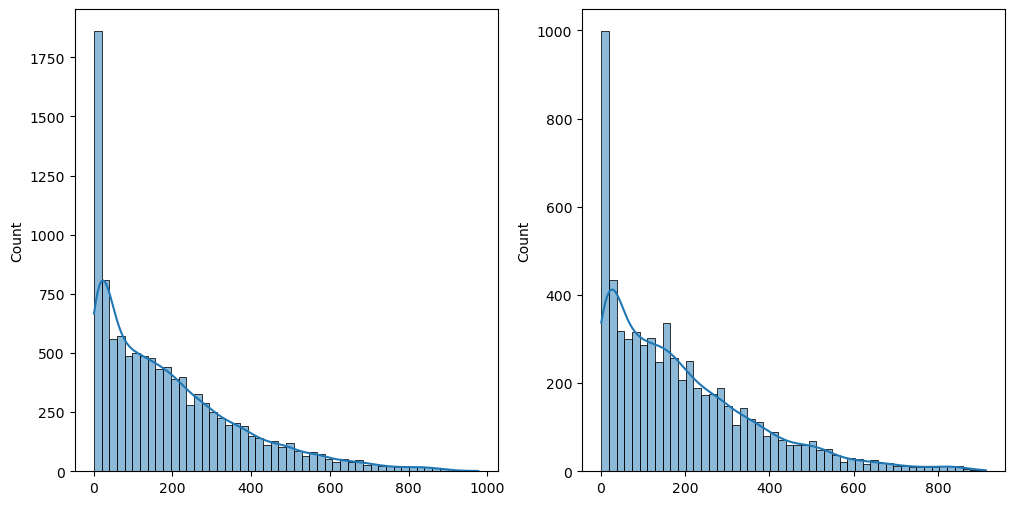

In [56]:
fig, (ax1, ax2) = plt.subplots(ncols=2)

fig.set_size_inches(12, 6)

sns.histplot(x=y_train.values,
            ax=ax1,
            kde=True,
            bins=50)
sns.histplot(x=prediction,
             ax=ax2,
             kde=True,
             bins=50)

### 8. Submit

In [57]:
# submission = pd.read_csv(file_list[0])
# submission.head()

In [58]:
# submission["count"] = prediction
# submission.head()

In [59]:
# submission.to_csv(f"./data/bike/Score_{score:.5f}_submission.csv", index=False)

In [60]:
# pd.read_csv("./data/bike\\Score_0.32869_submission.csv")